# Лабораторная работа 2. Композиции алгоритмов. Ранжирование.

Результат лабораторной работы − отчет. Мы предпочитаем принимать отчеты в формате ноутбуков IPython (ipynb-файл). Постарайтесь сделать ваш отчет интересным рассказом, последовательно отвечающим на вопросы из заданий. Помимо ответов на вопросы, в отчете так же должен быть код, однако чем меньше кода, тем лучше всем: нам − меньше проверять, вам — проще найти ошибку или дополнить эксперимент. При проверке оценивается четкость ответов на вопросы, аккуратность отчета и кода.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 15 баллов. Сдавать задание после указанного срока сдачи нельзя. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов и понижают карму (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий в открытом источнике, необходимо прислать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, нам необходима ссылка на источник).

### Правила сдачи
Выполненную работу следует отправить в систему Anytask. Более подробно о системе можно почитать на странице курса. Название отправляемого файла должно иметь следующий формат: Surname_Name_Group_NN.ipynb, где NN — номер лабораторной работы. Например, Kozlova_Anna_CS_02.ipynb.

## Bias-Variance decomposition. Композиции алгоритмов

![](http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png)

Рассмотрим задачу регрессии со среднеквадратичной функцией потерь, а также некоторый алгоритм $a$. Тогда качество алгоритма $a$ может быть записано следующим образом:

$$Q(a) = \mathbb{E}_{X^l} \mathbb{E}_{x,y}(a(x) - y)^2,$$

где первое матожидание вычисляется по всевозможным обучающим выборкам $X^l$ размера $l$. К сожалению, на реальных данных эта формула неприменима из-за невозможности сгенерировать необходимые для оценки данные. Поэтому проведем приближенный численный эксперимент с эмпирическими оценками матожиданий.

С помощью бутстраппинга можно просемплировать из обучающей выборки $N$ новых выборок того же размера, тем самым "имитируя" пространство всевозможных обучающих выборок, после чего обучить на каждой выбранный алгоритм. Обозначим вектор истинных меток тестовой выборки за $y \in \mathbb{R}^{m}$. Векторы прогнозов для объектов из тестовой выборки для каждой модели обозначим за $\hat{y}_i \in \mathbb{R}^{m}, i \in \{1, .., N\}$. Тогда средний квадрат ошибки по всем моделям на тестовой выборке запишется как

$$error=\frac{1}{N}\sum_{i=1}^{N}MSE(y,\hat{y}_i).$$

Обозначим среднее предсказание за $$\overline{y} = \frac{1}{N}\sum_{i=1}^{N} \hat{y}_i.$$

Тогда квадрат отклонения среднего предсказания и разброс прогнозов относительно среднего предсказания всех моделей на тестовой выборке от истинных меток запишутся следующим образом, соответственно:

$$bias^2 = MSE(y, \overline y),$$

$$variance = \frac{1}{N}\sum_{i=1}^N MSE(\hat{y}_i, \overline y).$$


Для начала рассмотрим в качестве алгоритма решающее дерево. Как известно, при увеличении высоты дерева алгоритм может быть сильно чувствителен к составу обучающей выборки. Чтобы подтвердить эти предположения, проведите следующие эксперименты.

Загрузите [набор данных](http://archive.ics.uci.edu/ml/datasets/BlogFeedback). Каждый объект — пост в блоге. Он описывается различными признаками: длина текста поста, наличие наиболее частотных слов, день недели, количество комментариев за последние 24 часа и т.п., а так же целевым признаком — количеством комментариев к посту. Полный список признаков и описание находятся на странице датасета. 

Разбейте данные из файла **blogData_train.csv** на обучающую и тестовую выборки в пропорциях 1 к 4 соответственно. Обратите внимание, что обучающая выборка меньше тестовой. Такая большая тестовая выборка позволит сделать измерение качества моделей достаточно достоверным. 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import sklearn

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from xgboost import DMatrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
df = pd.read_csv('BlogFeedback/blogData_train.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,271,272,273,274,275,276,277,278,279,280
0,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,40.30467,53.845657,0.0,401.0,15.0,15.52416,32.44188,0.0,377.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0


In [0]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df)[:, :280], df[280], test_size=0.8)

**(1 балл) Задание 1.** Постройте графики зависимости $error$, $bias^2$ и $variance$ от глубины решающего дерева (от 1 до 15 включительно) для $N=100$. 

In [0]:
def subsample(X_train, y_train):
    rnd_indices = np.random.choice(len(X_train), 2 * len(X_train))
    return X_train[rnd_indices], y_train.iloc[rnd_indices]

In [0]:
all_predictions = []
for depth in range(1, 16):
    predictions = []
    for _ in tqdm(range(100)):
        X_subsample, y_subsample = subsample(X_train, y_train)
        clf = DecisionTreeRegressor(max_depth=depth)
        clf.fit(X_subsample, y_subsample)
        predictions.append(clf.predict(X_test))
    all_predictions.append(predictions)

100%|██████████| 100/100 [02:17<00:00,  1.38s/it]


In [0]:
variances = [np.mean([mean_squared_error(np.mean(predictions, axis=0), pred) 
                      for pred in predictions]) for predictions in all_predictions]

biases = [mean_squared_error(y_test, np.mean(predictions, axis=0)) for predictions in all_predictions]

errors = [np.mean([mean_squared_error(y_test, prediction) 
                  for prediction in predictions]) for predictions in all_predictions]

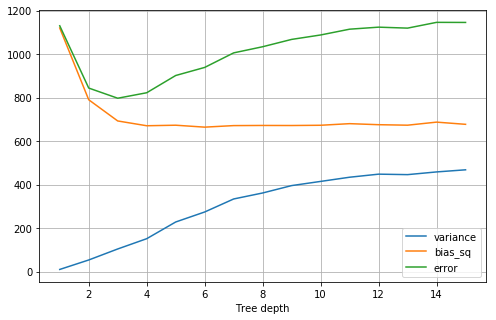

In [0]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, 16), variances, label='variance')
plt.plot(np.arange(1, 16), biases, label='bias_sq')
plt.plot(np.arange(1, 16), errors, label='error')
plt.xlabel('Tree depth')
plt.legend()
plt.grid()
plt.show()

**(0.5 балла) Задание 2.** Являются ли какие-то из полученных графиков монотонными? А должны ли они быть монотонными, если бы гипотетически эксперименты были проведены на всевозможных выборках? Почему? Убедитесь численно, что верно bias-variance разложение ошибки: $$error = bias^2 + variance$$

Численно мы легко убедимся в том, что ошибка равна $bias^2 + variance$, просто нарисовав график их суммы. Он окажется совпадающим с графиком $error$. Графики variance и bias выглядят монотонными.

Видно, что, начиная с некоторой высоты, ошибка монотонно растёт, хотя условия эксперимента для каждой из высот были одинаковы. На самом деле такого быть не должно, и ошибка должна колебаться случайным образом, так как подвыборки выбирались из обучающей выборки равномерно.

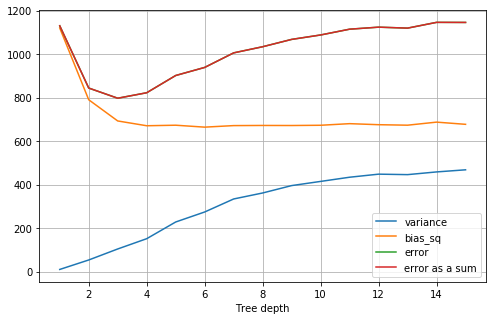

In [0]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, 16), variances, label='variance')
plt.plot(np.arange(1, 16), biases, label='bias_sq')
plt.plot(np.arange(1, 16), errors, label='error')
plt.plot(np.arange(1, 16), np.array(variances) + np.array(biases), label='error as a sum')
plt.xlabel('Tree depth')
plt.legend()
plt.grid()
plt.show()

## Композиции алгоритмов

Несмотря на описанный выше недостаток решающих деревьев, объединение их в композиции позволяет существенно улучшить качество предсказания. Рассмотрим несколько способов построения композиций.

### Bagging + RSM

![](https://sites.google.com/site/rajhansgondane2506/_/rsrc/1467898300734/publications/rrftrain.jpg?height=215&width=320)

Один из способов объединения алгоритмов в композиции — обучение каждого отдельного алгоритма на некоторой подвыборке из исходной выборки ([bagging](https://en.wikipedia.org/wiki/Bootstrap_aggregating)) и подмножестве исходных признаков ([RSM](https://en.wikipedia.org/wiki/Random_subspace_method)). В sklearn этот тип композиции реализован в классе [BaggingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html) (для случая регресии). Подобный подход также есть в реализации [RandomForest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

### Градиентный бустинг

В случае бустинга композиция алгоритмов строится последовательно. Каждый следующий базовый алгоритм акцентируется на тех объектах, на которых обученная ранее композиция допускала ошибку.

На данный момент одной из самых широко распространенных реализаций бустинга является библиотека [XGBoost](https://github.com/dmlc/xgboost). В ней большое внимание уделяется регуляризации и скорости, нежели в других реализациях бустинга (например,  [GradientBoostingRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) из sklearn). Кроме того, XGBoost позволяет оптимизировать различные функции потерь, а также более гибок, засчет большого числа параметров.

XGBoost строит композицию из $K$ базовых алгоритмов $b_k$:

$$ \hat{y}_i = \hat{y}_i^{K} = \sum_{k=1}^{K} b_k(x_i) = \hat{y}_i^{\left(K - 1\right)} + b_K(x_i), $$

минимизируя следующий функционал:

$$ Obj = \sum_{i=1}^N \mathcal{L}(y_i, \hat{y}_i ) + \sum_{k=1}^{K} \Omega(b_k),$$

где
 - $N$ — размер обучающей выборки;
 - $x_i, y_i, \hat{y}_i$ — i-ый объект, правильный ответ и предсказание модели для него;
 - $\hat{y}_i^{t}$ — предсказание композиции из $t$ уже обученных базовых алгоритмов для i-го объекта;
 - $\Omega$ — регуляризатор;
 - $\mathcal{L}(y_i, \hat{y}_i)$ — функция потерь.

Функционал, оптимизируемый на $t$-ой итерации:

$$ Obj^{(t)} = \sum_{i=1}^N \mathcal{L}\left(y_i, \hat{y}_i^{(t-1)} + b_t(x_i)\right) + \Omega(b_t).$$

В XGBoost реализовано несколько различных функций потерь, что позволяет решать задачи классификации (бинарной и мультиклассовой), регрессии и ранжирования. Вот некоторые из них:

- reg:linear — линейная регрессия
- reg:logistic — логистическая регрессия
- binary:logistic — логистическая регрессия
- multi:softmax — softmax функция потерь для многоклассовой классификации
- rank:pairwise — минимизация pairwise-функции потерь для задачи ранжирования

**(1 балл) Задание 3.** Проведите аналогичный эксперимент с bias-variance разложением для градиентного бустинга для количество алгоритмов 1, 5, 10, 25 и 50, используя в качестве базовых алгоритмов решающие деревья. Обратите внимание, что данная библиотека имеет два интерфейса (стандартный и аналог sklearn), названия параметров в которых могут отличаться.

In [0]:
all_predictions = []
n_estimators = [1, 5, 10, 25, 50]
for est in n_estimators:
    predictions = []
    for _ in tqdm(range(100)):
        X_subsample, y_subsample = subsample(X_train, y_train)
        clf = XGBRegressor(n_estimators=est)
        clf.fit(X_subsample, y_subsample)
        predictions.append(clf.predict(X_test))
    all_predictions.append(predictions)

100%|██████████| 100/100 [08:33<00:00,  5.13s/it]


In [0]:
variances = [np.mean([mean_squared_error(np.mean(predictions, axis=0), pred) 
                      for pred in predictions]) for predictions in all_predictions]

biases = [mean_squared_error(y_test, np.mean(predictions, axis=0)) for predictions in all_predictions]

errors = [np.mean([mean_squared_error(y_test, prediction) 
                  for prediction in predictions]) for predictions in all_predictions]

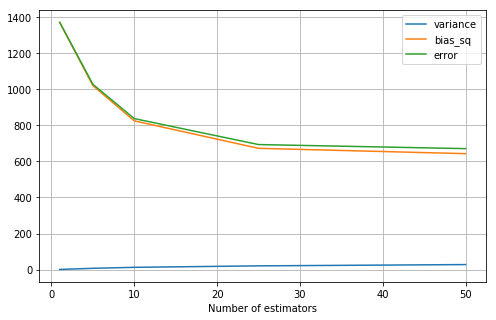

In [0]:
plt.figure(figsize=(8, 5))
plt.plot(n_estimators, variances, label='variance')
plt.plot(n_estimators, biases, label='bias_sq')
plt.plot(n_estimators, errors, label='error')
plt.xlabel('Number of estimators')
plt.legend()
plt.grid()
plt.show()

**(0.5 балла) Задание 4.** Отличаются ли графики в рассмотренных моделях (решающее дерево, градиентный бустинг на решающих деревьях)  между собой? На какую компоненту из разложения ошибки влияет объединение алгоритмов в рассмотренный тип композиции? Поясните свой ответ.

Да, графики очень отличаются. Видно, что дисперсия крайне мала по сравнению с прошлым графиком. То есть данный тип композиции уменьшает дисперсию и не даёт ей сильно расти с ростом estimators. Уменьшение дисперсии, видимо, следует из того, что каждый следующий базовый алгоритм акцентируется на тех объектах, на которых обученная ранее композиция допускала ошибку.

### Стекинг
![](https://4.bp.blogspot.com/-hCxAb57kzDQ/VuMgHy3hAhI/AAAAAAAAAVk/djmL9IHv5QkLWeudjE50qDoCTbiUrTetA/s1600/Stacking.jpg)

[Stacking](https://en.wikipedia.org/wiki/Ensemble_learning#Stacking) — еще один способ объединить несколько алгоритмов в один, который часто используется как в решении реальных задач из промышленной сферы, так и в конкурсах на платформах вроде Kaggle. Подход использует понятие *базовых классификаторов*, каждый из которых независимо обучается на некотором (возможно одном и том же) множестве признаков, а также *мета-классификатора*, использующего предсказания базовых классификаторов как факторы. 

Загрузите [датасет](https://archive.ics.uci.edu/ml/datasets/covertype). В тренировочных целях предлагается вместо задачи мультиклассификации решать задачу обычной бинарной классификации — научиться отличать **Spruce-Fir** (значение целевой переменной — 1) от **Lodgepole Pine** (значение целевой переменной — 2). Разделите выборку на обучение и тест в соотношении 50/50. В качестве метрики используйте [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

**(1 балл) Задание 5.** Использование мета-классификатора подразумевает получение предсказаний от базовых классификаторов для тех объектов обучающей выборки, на которых мета-классификатор будет обучаться. В свою очередь базовые классификаторы тоже должны быть обучены на некоторой выборке. Чтобы избежать переобучения, обучающее множество делится на $n$ фолдов, $(n-1)$ из которых используются для обучения базовых классификаторов, а $n$-ый — для предсказания (вычисления мета-фактора).

Для получения мета-факторов для тестовых данных базовые классификаторы могут быть обучены на всем обучающем множестве, поскольку проблема переобучения здесь не возникает. Другими словами, если мы хотим посчитать факторы для тестового множества, мы можем спокойно использовать обучающее множество для тренировки базовых классификаторов. Если же мы хотим посчитать факторы для обучающего множества, то необходимо следить, чтобы классификатор не предсказывал для тех объектов, на которых обучался.

Мета-классификатор может быть обучен как на множестве исходных факторов, дополненным мета-факторами, так и исключительно на множестве мета-факторов. Выбор зависит от решаемой задачи.

Напишите функцию, которая получает на вход классификатор, обучающую и тестовые выборки, а также параметры [кросс-валидатора](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) и возвращающую значения мета-фактора для обучающего и тестового множеств

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz&ts=1489637334&use_mirror=excellmedia

--2018-10-21 14:48:42--  https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.249
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11240707 (11M) [application/x-gzip]
Saving to: ‘covtype.data.gz’

covtype.data.gz     100%[===================>]  10.72M  14.4MB/s    in 0.7s    

2018-10-21 14:48:43 (14.4 MB/s) - ‘covtype.data.gz’ saved [11240707/11240707]



In [5]:
df = pd.read_csv('covtype.data.gz', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
binary_class_df = df[df[54] < 3]
binary_class_df.head()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
11,2886,151,11,371,26,5253,234,240,136,4051,...,0,0,0,0,0,0,0,0,0,2
12,2742,134,22,150,69,3215,248,224,92,6091,...,0,0,0,0,0,0,0,0,0,2


In [0]:
X_train, X_test, y_train, y_test = train_test_split(np.array(binary_class_df)[:, :54], 
                                                    np.array(binary_class_df[54]) - 1, test_size=0.5)

In [0]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv, *args, **kwargs):
    clf.fit(X_train, y_train)
    if hasattr(clf, 'predict_proba'):
        meta_feature_test = clf.predict_proba(X_test)[:, 1]
    else:
        meta_feature_test = clf.predict(X_test)

    meta_feature_train = np.zeros(y_train.shape)
    for train_ind, test_ind in cv.split(X_train):
        clf_clone = sklearn.base.clone(clf)
        clf_clone.fit(X_train[train_ind], y_train[train_ind])

        if hasattr(clf_clone, 'predict_proba'):
            meta_feature_train[test_ind] = clf_clone.predict_proba(X_train[test_ind])[:, 1]
        else:
            meta_feature_train[test_ind] = clf_clone.predict(X_train[test_ind])
    return meta_feature_train, meta_feature_test

Поэкспериментируйте со стекингом, ответьте на вопросы и обоснуйте наблюдения:
  - **(1 балл) Задание 6.** Обучите различные известные вам модели машинного обучения и сделайте из них стекинг-композицию. 
  
  Базовые алгоритмы могут отличаться друг от друга:
    - моделью машинного обучения,
    - гиперпараметрами (например, различные функции потерь или глубины деревьев),
    - набором факторов,
    - типом модели: для данной задачи можно использовать как классификаторы, так и регрессоры.
  
  Обратите внимание, что бинарные мета-факторы дают меньше полезного сигнала мета-классификатору, чем числовые, поэтому базовым классификаторам лучше возвращать вероятность/числовую функцию, чем метки классов.
  - **(1 балл) Задание 7.** Обучите мета-классификатор на различных наборах факторов:
    - исходные факторы,
    - исходные факторы + мета-факторы,
    - мета-факторы.
    
    Имеет ли смысл добавлять исходные факторы в мета-классификатор, если базовые классификаторы уже обучены на этом наборе? Удается ли добиться улучшения качества за счет стекинга? Какие классификаторы лучше сочетаются друг с другом в такой композиции?
  - **(0.5 балла) Задание 8.** Попробуйте разные размеры фолда при подсчете мета-факторов. Влияет ли размер на качество?
  - **(0.5 балла) Задание 9.** Зафиксируйте некоторый набор базовых классификаторов. Обучите поверх них линейную модель и сравните ее с мета-классификатором, который считает среднее по всем метафакторам. Дает ли преимущество линейная модель? О чем говорят коэффициенты линейной модели в данном случае?


In [0]:
def create_meta_dataset(classifiers, X_train, X_test, y_train, cv):
    train_data, test_data = [], []
    for clf in tqdm(classifiers):
        meta_feature_train, meta_feature_test = compute_meta_feature(clf, X_train, X_test, y_train, cv)
        train_data.append(meta_feature_train)
        test_data.append(meta_feature_test)
    return np.array(train_data).T, np.array(test_data).T

In [22]:
classifiers = [KNeighborsClassifier(), 
               LinearRegression(n_jobs=-1),
               RandomForestClassifier(n_jobs=-1), 
               LinearSVC()]

cv = KFold(n_splits=5, shuffle=True)
train_data, test_data = create_meta_dataset(classifiers, X_train, X_test, y_train, cv)
train_data[:5]



  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [01:05<03:17, 65.94s/it]

 50%|█████     | 2/4 [01:12<01:36, 48.09s/it]

 75%|███████▌  | 3/4 [01:39<00:41, 41.67s/it]

100%|██████████| 4/4 [07:21<00:00, 132.00s/it]



array([[0.        , 0.17939853, 0.        , 1.        ],
       [0.6       , 0.45468365, 0.9       , 1.        ],
       [0.        , 0.54343531, 0.3       , 1.        ],
       [1.        , 0.51167287, 1.        , 1.        ],
       [1.        , 0.35011406, 1.        , 1.        ]])

In [41]:
classifiers = [KNeighborsClassifier(n_neighbors=10), 
               KNeighborsClassifier(n_neighbors=15),
               DecisionTreeClassifier(max_depth=15), 
               DecisionTreeClassifier(max_depth=20)]

cv = KFold(n_splits=5, shuffle=True)
train_data_t_and_n, test_data_t_and_n = create_meta_dataset(classifiers, X_train, X_test, y_train, cv)
train_data_t_and_n[:5]



  0%|          | 0/4 [00:00<?, ?it/s]

 25%|██▌       | 1/4 [01:17<03:52, 77.65s/it]

 50%|█████     | 2/4 [02:59<02:49, 84.86s/it]

 75%|███████▌  | 3/4 [03:17<01:04, 64.86s/it]

100%|██████████| 4/4 [03:37<00:00, 51.47s/it]



array([[0.        , 0.        , 0.        , 0.        ],
       [0.4       , 0.66666667, 0.94626866, 1.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ]])

In [18]:
classifiers = [
    LinearSVC(),
    KNeighborsClassifier(3, n_jobs=-1),
    XGBClassifier(n_estimators=10),
    RandomForestClassifier(max_depth=10, n_estimators=20, n_jobs=-1)
]

cv = KFold(n_splits=5, shuffle=True)
train_data_last, test_data_last = create_meta_dataset(classifiers, X_train, X_test, y_train, cv)
train_data_last[:5]

100%|██████████| 4/4 [06:01<00:00, 112.68s/it]


array([[0.        , 0.        , 0.27540949, 0.14551586],
       [1.        , 1.        , 0.68730044, 0.731502  ],
       [1.        , 1.        , 0.35879132, 0.46998557],
       [1.        , 0.        , 0.36778948, 0.22789211],
       [0.        , 0.        , 0.59374022, 0.48141555]])

Сделали стекинг-композиции, посмотрим, насколько это было удачно.

In [0]:
def get_accuracy_scores(classifiers, X_train, X_test, y_train, y_test):
    classifiers = [sklearn.base.clone(clf) for clf in classifiers]
    names = [clf.__class__.__name__ for clf in classifiers]

    for clf in classifiers:
        clf.fit(X_train, y_train)
    scores = [accuracy_score(y_test, np.rint(clf.predict(X_test))) for clf in classifiers]
     
    result = {}
    for name, score in zip(names, scores):
        result[name] = score
    return result


def try_diffirent_feature_compositions(meta_classifiers, 
                                       X_train, X_test, 
                                       train_data_meta, test_data_meta, 
                                       y_train, y_test):
    result = {}
    result["Only meta-features"] = get_accuracy_scores(meta_classifiers, train_data_meta, test_data_meta, y_train, y_test)
    result["Only initial features"] = get_accuracy_scores(meta_classifiers, X_train, X_test, y_train, y_test)
    result["Meta features plus initial features"] = get_accuracy_scores(meta_classifiers, \
                                                        np.concatenate((X_train, train_data_meta), axis=1), \
                                                        np.concatenate((X_test, test_data_meta), axis=1), y_train, y_test)
    return pd.DataFrame(result)

In [0]:
meta_classifiers = [KNeighborsClassifier(), 
                    LinearRegression(n_jobs=-1),
                    RandomForestClassifier(n_jobs=-1)]

In [59]:
%time try_diffirent_feature_compositions(meta_classifiers, X_train, X_test, train_data, test_data, y_train, y_test)

CPU times: user 1min 53s, sys: 719 ms, total: 1min 54s
Wall time: 1min 39s


,Meta features plus initial features,Only initial features,Only meta-features
KNeighborsClassifier,0.966696,0.966696,0.967117
LinearRegression,0.969839,0.775725,0.969734
RandomForestClassifier,0.970154,0.941487,0.959923


In [60]:
%time try_diffirent_feature_compositions(meta_classifiers, X_train, X_test, train_data_t_and_n, test_data_t_and_n, y_train, y_test)

CPU times: user 2min 8s, sys: 626 ms, total: 2min 9s
Wall time: 1min 56s


,Meta features plus initial features,Only initial features,Only meta-features
KNeighborsClassifier,0.96670,0.966696,0.959353
LinearRegression,0.96437,0.775725,0.964168
RandomForestClassifier,0.96462,0.942186,0.956101


In [20]:
%time try_diffirent_feature_compositions(meta_classifiers, X_train, X_test, train_data_last, test_data_last, y_train, y_test)

CPU times: user 1min 56s, sys: 805 ms, total: 1min 56s
Wall time: 1min 42s


,Meta features plus initial features,Only initial features,Only meta-features
KNeighborsClassifier,0.967403,0.967403,0.965339
LinearRegression,0.969799,0.776472,0.969799
RandomForestClassifier,0.969245,0.943931,0.963158


**Имеет ли смысл добавлять исходные факторы в мета-классификатор, если базовые классификаторы уже обучены на этом наборе? Удается ли добиться улучшения качества за счет стекинга? Какие классификаторы лучше сочетаются друг с другом в такой композиции?**

По результатам выше видно, что смесь исходных факторов и метафакторов даёт повышение качества.  Единственным исключением был KNN в самом первом случае.

Лучшее качество показало следующее сочетание классификаторов:
1. KNeighborsClassifier(), 
2. LinearRegression(n_jobs=-1),
3. RandomForestClassifier(n_jobs=-1), 
4. LinearSVC()

Скорее всего, этот результат достигается за счёт совершенно различной природы каждого из приведённых классификаторов.

Попробуем увеличить число фолдов. Для генерации мета-фичей возьмём первый набор классификаторов.

In [21]:
classifiers = [KNeighborsClassifier(), 
               LinearRegression(n_jobs=-1),
               RandomForestClassifier(n_jobs=-1), 
               LinearSVC()]

cv = KFold(n_splits=10, shuffle=True)
train_data, test_data = create_meta_dataset(classifiers, X_train, X_test, y_train, cv)
train_data[:5]

100%|██████████| 4/4 [11:35<00:00, 205.38s/it]


array([[ 0.        , -0.07571379,  0.        ,  0.        ],
       [ 1.        ,  0.74208088,  1.        ,  1.        ],
       [ 1.        ,  0.39862334,  0.9       ,  0.        ],
       [ 0.        ,  0.30014396,  0.1       ,  0.        ],
       [ 0.        ,  0.62722099,  0.2       ,  1.        ]])

In [16]:
%time try_diffirent_feature_compositions(meta_classifiers, X_train, X_test, train_data, test_data, y_train, y_test)

CPU times: user 1min 48s, sys: 769 ms, total: 1min 49s
Wall time: 1min 35s


,Meta features plus initial features,Only initial features,Only meta-features
KNeighborsClassifier,0.967399,0.967403,0.968211
LinearRegression,0.970295,0.776472,0.970219
RandomForestClassifier,0.970687,0.943289,0.961070


Увеличение числа фолдов почти не улучшило качество классификации.

In [26]:
lr = LogisticRegression()
lr.fit(train_data, y_train)
y_pred = lr.predict(test_data)
print('linear model over meta dataset: ', accuracy_score(y_test, y_pred))
print('averaging over meta dataset: ', accuracy_score(y_test, np.round(np.mean(test_data, axis=1))))

linear model over meta dataset:  0.9714829281297083
averaging over meta dataset:  0.9076224598196073


**Дает ли преимущество линейная модель? О чем говорят коэффициенты линейной модели в данном случае?**

Линейная модель показывает намного более хороший результат, чем простое усреднение. Вообще, её результат лучший из всех предыдущих. Видимо, стоило так же рассматривать логистическую регрессию в качестве мета-классификатора.

In [30]:
lr.coef_ 

array([[ 7.43400692, -1.51068721,  5.02942403, -0.11047876]])

Коэффициенты линейной модели говорят о том, на сколько полезен тот или иной признак. Видно, что наибольший по модулю коэффициент приходится на KNeighborsClassifier(), что удивительно) 

## Поисковое ранжирование

![](http://i.imgur.com/2QnD2nF.jpg)

Задачу поискового ранжирования можно описать следующим образом: имеется множество документов $d \in D$ и множество запросов $q \in Q$. Требуется оценить *степень релевантности* документа по отношению к запросу: $(q, d) \mapsto r$, относительно которой будет производиться ранжирование. Для восстановления этой зависимости используются методы машинного обучения. Обычно используется три типа:
 - признаки запроса $q$, например: мешок слов текста запроса, его длина, ...
 - документа $d$, например: значение PageRank, мешок слов, доменное имя, ...
 - пары $(q, d)$, например: число вхождений фразы из запроса $q$ в документе $d$, ...

Одна из отличительных особенностей задачи ранжирования от классических задач машинного обучения заключается в том, что качество результата зависит не от предсказанных оценок релевантности, а от порядка следования документов в рамках конкретного запроса, т.е. важно не абсолютное значение релевантности (его достаточно трудно формализовать в виде числа), а то, более или менее релевантен документ, относительно других документов.
### Подходы к решению задачи ранжирования
Существуют 3 основных подхода, различие между которыми в используемой функции потерь:
  
1. **Pointwise подход**. В этом случае рассматривается *один объект* (в случае поискового ранжирования - конкретный документ) и функция потерь считается только по нему. Любой стандартный классификатор или регрессор может решать pointwise задачу ранжирования, обучившись предсказывать значение таргета. Итоговое ранжирование получается после сортировки документов к одному запросу по предсказанию такой модели.
2. **Pairwise подход**. В рамках данной модели функция потерь вычисляется по *паре объектов*. Другими словами, функция потерь штрафует модель, если отражированная этой моделью пара документов оказалась в неправильном порядке.
3. **Listwise подход**. Этот подход использует все объекты для вычисления функции потерь, стараясь явно оптимизировать правильный порядок.

### Оценка качества

Для оценивания качества ранжирования найденных документов в поиске используются асессорские оценки. Само оценивание происходит на скрытых от обучения запросах $Queries$. Для этого традиционно используется метрика *DCG* ([Discounted Cumulative Gain](https://en.wikipedia.org/wiki/Discounted_cumulative_gain)) и ее нормализованный вариант — *nDCG*, всегда принимающий значения от 0 до 1.
Для одного запроса DCG считается следующим образом:
$$ DCG = \sum_{i=1}^P\frac{(2^{rel_i} - 1)}{\log_2(i+1)}, $$

где $P$ — число документов в поисковой выдаче, $rel_i$ — релевантность (асессорская оценка) документа, находящегося на i-той позиции.

*IDCG* — идеальное (наибольшее из возможных) значение *DCG*, может быть получено путем ранжирования документов по убыванию асессорских оценок.

Итоговая формула для расчета *nDCG*:

$$nDCG = \frac{DCG}{IDCG} \in [0, 1].$$

Чтобы оценить значение *nDCG* на выборке $Queries$ ($nDCG_{Queries}$) размера $N$, необходимо усреднить значение *nDCG* по всем запросам  выборки:
$$nDCG_{Queries} = \frac{1}{N}\sum_{q \in Queries}nDCG(q).$$

Пример реализации метрик ранжирование на python можно найти [здесь](https://gist.github.com/mblondel/7337391).

Загрузите данные конкурса [Интернет-математика 2009](http://imat2009.yandex.ru/datasets). Там же находится описание данных. Сами данные можно скачать [здесь](https://www.dropbox.com/s/xj3g18s01m1euzl/imat2009.tar.bz2?dl=0). Разбейте обучающую выборку на обучение и контроль в соотношении 70 / 30. Обратите внимание на формат данных: разбивать необходимо множество запросов, а не строчки датасета.

In [2]:
!wget https://www.dropbox.com/s/xj3g18s01m1euzl/imat2009.tar.bz2&ts=1489637334&use_mirror=excellmedia


--2018-10-22 10:48:49--  https://www.dropbox.com/s/xj3g18s01m1euzl/imat2009.tar.bz2
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xj3g18s01m1euzl/imat2009.tar.bz2 [following]
--2018-10-22 10:48:50--  https://www.dropbox.com/s/raw/xj3g18s01m1euzl/imat2009.tar.bz2
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc18d6aa0fdf2c3825c119ad150.dl.dropboxusercontent.com/cd/0/inline/ATo5R65U8qj0h6XOeZG2nno1X7Or-ka4rEgGiTrlhqKCon8Rs4_miAgTnP6_xCj9mCvnvWUSZgRhHShdSePO_K-HBRq5RH4Vu2cD4ZmcAHHrYG3cIABzZHC51EOdlMAOOdPCW4tqu7g5Ah3yiWd_wbLz832KWhAUBSoH4o2IEKEEbIhvs7MQRSPz5nE8aJ5nmNY/file [following]
--2018-10-22 10:48:50--  https://ucc18d6aa0fdf2c3825c119ad150.dl.dropboxusercontent.com/cd/0/inline/ATo5R65U8qj0h6XOeZG2nno1X7Or-ka4rEgGiTr

In [3]:
!tar xvjf imat2009.tar.bz2

imat2009-datasets/
imat2009-datasets/imat2009_test.txt
imat2009-datasets/imat2009_learning.txt


In [0]:
with open('imat2009-datasets/imat2009_learning.txt') as f:
    train_data = f.readlines()
with open('imat2009-datasets/imat2009_test.txt') as f:
    test_data = f.readlines()

In [58]:
train_data[0][:100]

'1 1:0.000023 7:0.704953 8:0.550315 9:0.032294 11:0.712631 14:0.015686 15:0.137255 16:0.302576 17:1.0'

In [0]:
def extract_features(feature_arr):
    features = np.zeros(245)
    for line in feature_arr:
        num, value = line.split(':')
        features[int(num) - 1] = float(value)
    return features

  
def create_dataset(data, is_train_data=False):
    features, queries, relevances = [], [], []
    
    for line in data:
        feature_array = line.strip().split()
        relevances.append(feature_array[0])
        features.append(extract_features(feature_array[1: -2]))
        queries.append(feature_array[-1])
        
    df = pd.DataFrame(features)
    df['query'] = queries
    if is_train_data:
        df['relevance'] = relevances
    return df

  
def train_test_split_by_quieries(data):
    all_train_data = create_dataset(data, is_train_data=True)
    
    queries = np.unique([line.strip().split()[-1] for line in data])
    train_queries, test_queries = train_test_split(queries, train_size=0.7)

    train_data = all_train_data[list(map(lambda q : q in train_queries, all_train_data['query']))]
    test_data = all_train_data[list(map(lambda q : q in test_queries, all_train_data['query']))]
    
    columns_to_take = train_data.columns[:-1]
    
    return train_data[columns_to_take], test_data[columns_to_take], \
           train_data['relevance'].astype(float), test_data['relevance'].astype(float)

In [6]:
X_train, X_test, y_train, y_test = train_test_split_by_quieries(train_data)

X_train.shape, X_test.shape

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


((69018, 246), (28272, 246))

In [7]:
test_data_as_df = create_dataset(test_data)
test_data_as_df.head()

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,query
0,0.0,1.0,0.0,0.00,0.0,0.0,0.479999,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,1.000000,0.0,16427
1,0.0,1.0,0.0,0.51,0.0,1.0,0.807433,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.42843,0.0,0.000000,0.0,0.933333,0.0,16427
2,0.0,1.0,0.0,0.08,0.0,1.0,0.754434,0.684276,0.0,0.005165,...,0.0,0.0,0.0,0.00000,0.0,0.078431,0.0,0.949020,0.0,16427
3,0.0,1.0,0.0,0.51,0.0,0.0,0.742314,0.576655,0.0,0.000000,...,0.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.803922,0.0,16427
4,0.0,1.0,0.0,0.51,0.0,0.0,0.625239,0.000000,0.0,0.001706,...,0.0,0.0,0.0,0.00000,0.0,0.690196,0.0,1.000000,0.0,16427


Далее рассмотрим несколько подходов предсказания релевантности. Для оценивания качества моделей используйте метрику nDCG на контроле. В случае подбора гиперпараметров используйте кросс-валидацию по 5 блокам, где разбиение должно быть по запросам, а не строчкам датасета.

**(1 балл) Задание 10.** *Pointwise* подход. Воспользовавшись известными вам техниками построения линейной регрессии, обучите модель, предсказывающую оценку асессора.

Возьмём реализацию метрик, приведённую по ссылке в задании.

In [0]:
def dcg_score(y_true, y_score, k=10, gains="exponential"):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])
    if gains == "exponential":
        gains = 2 ** y_true - 1
    elif gains == "linear":
        gains = y_true
    else:
        raise ValueError("Invalid gains option.")

    # highest rank is 1 so +2 instead of +1
    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gains / discounts)


def ndcg_score(y_true, y_score, k=10, gains="exponential"):
    best = dcg_score(y_true, y_true, k, gains)
    actual = dcg_score(y_true, y_score, k, gains)
    if best == 0 and actual == 0:
        return 1
    return actual / best

Посчитаем NCDG. Для каждого запроса считаем ndcg, потом усредняем

In [118]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

ndcgs = []
for q in np.unique(X_test['query']):
    bool_idxs = (X_test['query'] == q)
    ndcgs.append(ndcg_score(np.array(y_test[bool_idxs]), y_pred[bool_idxs]))
    
print('NDCG = {}'.format(np.mean(ndcgs)))

NDCG = 0.8301642959109


###  Ранжируем с XGBoost

XGBoost имеет несколько функций потерь для решения задачи ранжирования:
1. **reg:linear** — данную функцию потерь можно использовать для решения задачи ранжирование *pointwise* подходом.
2. **rank:pairwise** — в качестве *pairwise* модели в XGBoost реализован [RankNet](http://icml.cc/2015/wp-content/uploads/2015/06/icml_ranking.pdf), в котором минимизируется гладкий функционал качества ранжирования: $$ Obj = \sum_{i \prec j} \mathcal{L}\left(a(x_j) - a(x_i)\right) \rightarrow min $$ $$ \mathcal{L}(M) = log(1 + e^{-M}), $$ где $ a(x) $ - функция ранжирования. Суммирование ведется по всем парам объектов, для которых определено отношение порядка, например, для пар документов, показанных по одному запросу. Таким образом функция потерь штрафует за то, что пара объектов неправильно упорядочена.
3. **rank:map, rank:ndcg** — реализация [LambdaRank](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/MSR-TR-2010-82.pdf) для двух метрик: [MAP](https://en.wikipedia.org/wiki/Information_retrieval#Mean_average_precision) и **nDCG**. Известно, что для того, чтобы оптимизировать негладкий функционал, такой как **nDCG**,  нужно домножить градиент функционала $ Obj(a) $ на значение $\Delta NDCG_{ij} $ — изменение значения функционала качества при замене $x_i$ на $ x_j$.  Поскольку для вычисления метрик необходимы все объекты выборки, то эти две ранжирующие функции потерь являются представителями класса *listwise* моделей.

**(2 балла) Задание 11.** Обучите модели **reg:linear**, **rank:pairwise** и **rank:ndcg**, в качестве метрики оценки качества (*eval_metric*) используя *nDCG*, а в качестве бустера решающее дерево. Настройте [параметры](https://github.com/dmlc/xgboost/blob/master/doc/parameter.md) алгоритма и добейтесь высокого качества на тестовой выборке.

In [8]:
train_indices, train_lengths = [], []
for name, group in pd.groupby(X_train, 'query'):
    train_indices += list(group.index)
    train_lengths.append(len(group))
    
test_indices, test_lengths = [], []
for name, group in pd.groupby(X_test, 'query'):
    test_indices += list(group.index)
    test_lengths.append(len(group))

X_train, y_train = X_train.loc[train_indices], y_train.loc[train_indices]
X_test, y_test = X_test.loc[test_indices], y_test.loc[test_indices]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  import sys


In [88]:
train_dmatrix = DMatrix(X_train[X_train.columns[:-1]], y_train)
valid_dmatrix = DMatrix(X_test[X_test.columns[:-1]], y_test)

train_dmatrix.set_group(train_lengths)
valid_dmatrix.set_group(test_lengths)

params = {'objective': 'reg:linear', 'eval_metric' : 'ndcg'}
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=100, verbose_eval=50, evals=[(valid_dmatrix, 'validation')])

[0]	validation-ndcg:0.833818
[50]	validation-ndcg:0.864369
[99]	validation-ndcg:0.86474


Подберем параметры.

In [0]:
def search_for_one_param(param_name, param_list, objective):
    for param in param_list:
        print('{} = {}'.format(param_name, param))
        params = {
            'objective': objective,
            param_name: param,
            'eval_metric' : 'ndcg'
        }
        xgb_model = xgb.train(params, train_dmatrix, num_boost_round=100, verbose_eval=100,
                               evals=[(valid_dmatrix, 'validation')])
        print()
    print()

        
def search_for_two_params(first_param_name, first_param_list, 
                          second_param_name, second_param_list, objective):
    for first_param in first_param_list:
        for second_param in second_param_list:
            print('{} = {}, {} = {}'.format(first_param_name, first_param, second_param_name, second_param))
            params = {
                'objective': objective,
                first_param_name: first_param,
                second_param_name: second_param,
                'eval_metric' : 'ndcg'
            }
            xgb_model = xgb.train(params, train_dmatrix, num_boost_round=100, verbose_eval=100,
                                   evals=[(valid_dmatrix, 'validation')])
            print()
    print()

In [93]:
search_for_one_param('lambda', np.linspace(0, 25, 10), objective='reg:linear')

lambda = 0.0
[0]	validation-ndcg:0.833465
[99]	validation-ndcg:0.862398

lambda = 2.7777777777777777
[0]	validation-ndcg:0.833833
[99]	validation-ndcg:0.864841

lambda = 5.555555555555555
[0]	validation-ndcg:0.832397
[99]	validation-ndcg:0.867538

lambda = 8.333333333333332
[0]	validation-ndcg:0.831546
[99]	validation-ndcg:0.86712

lambda = 11.11111111111111
[0]	validation-ndcg:0.832445
[99]	validation-ndcg:0.86691

lambda = 13.88888888888889
[0]	validation-ndcg:0.832177
[99]	validation-ndcg:0.868584

lambda = 16.666666666666664
[0]	validation-ndcg:0.832304
[99]	validation-ndcg:0.867692

lambda = 19.444444444444443
[0]	validation-ndcg:0.831389
[99]	validation-ndcg:0.869353

lambda = 22.22222222222222
[0]	validation-ndcg:0.832794
[99]	validation-ndcg:0.867104

lambda = 25.0
[0]	validation-ndcg:0.832034
[99]	validation-ndcg:0.867854




Лучший результат: lambda =13.88888888888889.

In [94]:
search_for_two_params('max_depth', range(3, 10, 2), 'min_child_weight', [4, 5, 6], objective='reg:linear')

max_depth = 3, min_child_weight = 4
[0]	validation-ndcg:0.814671
[99]	validation-ndcg:0.865415

max_depth = 3, min_child_weight = 5
[0]	validation-ndcg:0.814671
[99]	validation-ndcg:0.865554

max_depth = 3, min_child_weight = 6
[0]	validation-ndcg:0.814671
[99]	validation-ndcg:0.865455

max_depth = 5, min_child_weight = 4
[0]	validation-ndcg:0.82738
[99]	validation-ndcg:0.866944

max_depth = 5, min_child_weight = 5
[0]	validation-ndcg:0.82738
[99]	validation-ndcg:0.867447

max_depth = 5, min_child_weight = 6
[0]	validation-ndcg:0.827453
[99]	validation-ndcg:0.867801

max_depth = 7, min_child_weight = 4
[0]	validation-ndcg:0.836616
[99]	validation-ndcg:0.864236

max_depth = 7, min_child_weight = 5
[0]	validation-ndcg:0.836346
[99]	validation-ndcg:0.862354

max_depth = 7, min_child_weight = 6
[0]	validation-ndcg:0.836435
[99]	validation-ndcg:0.863897

max_depth = 9, min_child_weight = 4
[0]	validation-ndcg:0.836524
[99]	validation-ndcg:0.858669

max_depth = 9, min_child_weight = 5
[0]	va

best parameters:  

max_depth = 5, min_child_weight = 6  
[0]	validation-ndcg:0.827453  
[99]	validation-ndcg:0.867801  

In [95]:
search_for_one_param('gamma', [i / 10.0 for i in range(0, 5)], objective='reg:linear')

gamma = 0.0
[0]	validation-ndcg:0.833818
[99]	validation-ndcg:0.86474

gamma = 0.1
[0]	validation-ndcg:0.833818
[99]	validation-ndcg:0.866566

gamma = 0.2
[0]	validation-ndcg:0.833818
[99]	validation-ndcg:0.86384

gamma = 0.3
[0]	validation-ndcg:0.833818
[99]	validation-ndcg:0.864398

gamma = 0.4
[0]	validation-ndcg:0.833818
[99]	validation-ndcg:0.864359




best parameter:

gamma = 0.1  
[0]	validation-ndcg:0.833818  
[99]	validation-ndcg:0.866566  

In [96]:
search_for_two_params('subsample', [i / 10.0 for i in range(6, 10)], 
                      'colsample_bytree', [i / 10.0 for i in range(6, 10)], 
                       objective='reg:linear')

subsample = 0.6, colsample_bytree = 0.6
[0]	validation-ndcg:0.830057
[99]	validation-ndcg:0.864258

subsample = 0.6, colsample_bytree = 0.7
[0]	validation-ndcg:0.832561
[99]	validation-ndcg:0.86128

subsample = 0.6, colsample_bytree = 0.8
[0]	validation-ndcg:0.830918
[99]	validation-ndcg:0.862593

subsample = 0.6, colsample_bytree = 0.9
[0]	validation-ndcg:0.831695
[99]	validation-ndcg:0.860113

subsample = 0.7, colsample_bytree = 0.6
[0]	validation-ndcg:0.829329
[99]	validation-ndcg:0.863537

subsample = 0.7, colsample_bytree = 0.7
[0]	validation-ndcg:0.834767
[99]	validation-ndcg:0.866846

subsample = 0.7, colsample_bytree = 0.8
[0]	validation-ndcg:0.834115
[99]	validation-ndcg:0.863773

subsample = 0.7, colsample_bytree = 0.9
[0]	validation-ndcg:0.832109
[99]	validation-ndcg:0.861671

subsample = 0.8, colsample_bytree = 0.6
[0]	validation-ndcg:0.826272
[99]	validation-ndcg:0.863523

subsample = 0.8, colsample_bytree = 0.7
[0]	validation-ndcg:0.830598
[99]	validation-ndcg:0.862834

s

best result:   

subsample = 0.7, colsample_bytree = 0.7  
[0]	validation-ndcg:0.834767  
[99]	validation-ndcg:0.866846  

In [98]:
search_for_one_param('reg_alpha', [0, 0.001, 0.005, 0.01, 0.05], objective='reg:linear')

reg_alpha = 0
[0]	validation-ndcg:0.833818
[99]	validation-ndcg:0.86474

reg_alpha = 0.001
[0]	validation-ndcg:0.833818
[99]	validation-ndcg:0.863871

reg_alpha = 0.005
[0]	validation-ndcg:0.833818
[99]	validation-ndcg:0.865645

reg_alpha = 0.01
[0]	validation-ndcg:0.833818
[99]	validation-ndcg:0.864793

reg_alpha = 0.05
[0]	validation-ndcg:0.833818
[99]	validation-ndcg:0.863561




Можно взять alpha =  0.01, её результат validation-ndcg:0.833818

In [91]:
params = {'objective': 'reg:linear’,
		'eval_metric' : 'ndcg'
		'lambda': 13.88888888888889,
		'gamma': 0.1,
		 'max_depth': 5, 
		'min_child_weight' : 6,
		 'subsample': 0.7,
                 'colsample_bytree': 0.7,
		'reg_alpha': 0.01}

xgb_model = xgb.train(params, train_dmatrix, num_boost_round=100, verbose_eval=50,
                      evals=[(valid_dmatrix, 'validation')])

[0]	validation-ndcg:0.835159
[50]	validation-ndcg:0.862947
[99]	validation-ndcg:0.863061


Это хуже предыдущего результата.

[0]	validation-ndcg:0.833818  
[50]	validation-ndcg:0.864369  
[99]	validation-ndcg:0.86474  

Лучший результат на валидации для pointwise подхода в итоге: validation-ndcg:0.86474.   

Запустим валидацию с параметрами по умолчанию для rank:pairwise

In [100]:
params = {'objective': 'rank:pairwise', 'eval_metric' : 'ndcg'}
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=100, verbose_eval=50,
                           evals=[(valid_dmatrix, 'validation')])

[0]	validation-ndcg:0.826776
[50]	validation-ndcg:0.870235
[99]	validation-ndcg:0.87173


Подберём параметры.

In [0]:
objective = 'rank:pairwise'
search_for_one_param('lambda', np.linspace(0, 25, 10), objective=objective)
search_for_two_params('max_depth', range(3, 10, 2), 'min_child_weight', [4, 5, 6], objective=objective)
search_for_one_param('gamma', [i / 10.0 for i in range(0, 5)], objective=objective)
search_for_two_params('subsample', [i / 10.0 for i in range(6, 10)], 
                      'colsample_bytree', [i / 10.0 for i in range(6, 10)], 
                       objective=objective)
search_for_one_param('reg_alpha', [0, 0.001, 0.005, 0.01, 0.05], objective=objective)

lambda = 0.0
[0]	validation-ndcg:0.826595
[99]	validation-ndcg:0.86956

lambda = 2.7777777777777777
[0]	validation-ndcg:0.826277
[99]	validation-ndcg:0.87082

lambda = 5.555555555555555
[0]	validation-ndcg:0.825881
[99]	validation-ndcg:0.870861

lambda = 8.333333333333332
[0]	validation-ndcg:0.82471
[99]	validation-ndcg:0.869596

lambda = 11.11111111111111
[0]	validation-ndcg:0.824727
[99]	validation-ndcg:0.870992

lambda = 13.88888888888889
[0]	validation-ndcg:0.824776
[99]	validation-ndcg:0.870065

lambda = 16.666666666666664
[0]	validation-ndcg:0.824776
[99]	validation-ndcg:0.872437

lambda = 19.444444444444443
[0]	validation-ndcg:0.825033
[99]	validation-ndcg:0.870377

lambda = 22.22222222222222
[0]	validation-ndcg:0.824938
[99]	validation-ndcg:0.87291

lambda = 25.0
[0]	validation-ndcg:0.824873
[99]	validation-ndcg:0.873696


max_depth = 3, min_child_weight = 4
[0]	validation-ndcg:0.817668
[99]	validation-ndcg:0.868179

max_depth = 3, min_child_weight = 5
[0]	validation-ndcg:0.817

In [60]:
params = {'objective': 'rank:pairwise',
		'eval_metric' : 'ndcg',
		'lambda': 0, 
		 'max_depth': 7,
		'gamma': 0,
		'min_child_weight' : 6,
		 'subsample': 0.8,
     'colsample_bytree': 0.9,
		'reg_alpha': 0.01}


xgb_model = xgb.train(params, train_dmatrix, num_boost_round=4,
                           evals=[(valid_dmatrix, 'validation')])

[0]	validation-ndcg:0.826863
[1]	validation-ndcg:0.837534
[2]	validation-ndcg:0.842911
[3]	validation-ndcg:0.843957


Прошлый результат был лучше.  

[0]	validation-ndcg:0.831313  
[1]	validation-ndcg:0.840101  
[2]	validation-ndcg:0.845807  
[3]	validation-ndcg:0.851514  


In [176]:
params = {'objective': 'rank:ndcg', 'eval_metric' : 'ndcg'}
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=4,
                           evals=[(valid_dmatrix, 'validation')])

[0]	validation-ndcg:0.838937
[1]	validation-ndcg:0.84245
[2]	validation-ndcg:0.842455
[3]	validation-ndcg:0.845526


In [97]:
objective = 'rank:ndcg'
search_for_one_param('lambda', np.linspace(0, 25, 10), objective=objective)
search_for_two_params('max_depth', range(3, 10, 2), 'min_child_weight', [4, 5, 6], objective=objective)
search_for_one_param('gamma', [i / 10.0 for i in range(0, 5)], objective=objective)
search_for_two_params('subsample', [i / 10.0 for i in range(6, 10)], 
                      'colsample_bytree', [i / 10.0 for i in range(6, 10)], 
                       objective=objective)
search_for_one_param('reg_alpha', [0, 0.001, 0.005, 0.01, 0.05], objective=objective)

lambda = 0.0
[0]	validation-ndcg:0.829762
[99]	validation-ndcg:0.868528

lambda = 2.7777777777777777
[0]	validation-ndcg:0.830847
[99]	validation-ndcg:0.868187

lambda = 5.555555555555555
[0]	validation-ndcg:0.832971
[99]	validation-ndcg:0.86817

lambda = 8.333333333333332
[0]	validation-ndcg:0.832983
[99]	validation-ndcg:0.866062

lambda = 11.11111111111111
[0]	validation-ndcg:0.832736
[99]	validation-ndcg:0.871226

lambda = 13.88888888888889
[0]	validation-ndcg:0.832596
[99]	validation-ndcg:0.870343

lambda = 16.666666666666664
[0]	validation-ndcg:0.831487
[99]	validation-ndcg:0.870221

lambda = 19.444444444444443
[0]	validation-ndcg:0.833418
[99]	validation-ndcg:0.870462

lambda = 22.22222222222222
[0]	validation-ndcg:0.833159
[99]	validation-ndcg:0.869664

lambda = 25.0
[0]	validation-ndcg:0.832958
[99]	validation-ndcg:0.868203


max_depth = 3, min_child_weight = 4
[0]	validation-ndcg:0.822615
[99]	validation-ndcg:0.863936

max_depth = 3, min_child_weight = 5
[0]	validation-ndcg:0.

In [56]:
params = {'objective': 'rank:ndcg’,
 		'eval_metric' : 'ndcg',
		'lambda': 11.11111111111111, 
		 'max_depth': 9,
		'gamma': 0.2,
		'min_child_weight' : 5,
		 'subsample': 0.9,
     'colsample_bytree': 0.6,
		'reg_alpha': 0.001}

xgb_model = xgb.train(params, train_dmatrix, num_boost_round=4,
                           evals=[(valid_dmatrix, 'validation')])

[0]	validation-ndcg:0.827323
[1]	validation-ndcg:0.837183
[2]	validation-ndcg:0.843077
[3]	validation-ndcg:0.844363


И снова хуже, чем предыдущий результат.

[0]	validation-ndcg:0.838937  
[1]	validation-ndcg:0.84245  
[2]	validation-ndcg:0.842455  
[3]	validation-ndcg:0.845526  

#### Пользовательская функция потерь

Библиотека XGBoost позволяет использовать пользовательские функции потерь. Для этого необходимо реализовать функцию, принимающую на вход вектор предсказанных значений и обучающую выборку, и возвращающую градиент и гессиан, посчитанный по входным данным.

Важно отметить, что XGBoost использует диагональную аппроксимацию гессиана, таким образом все недиагональные элементы считаются малозначимыми и приравниваются нулю, поэтому и градиент, и гессиан являются векторами длины размера обучающей выборки.

**(4 балла) Задание 12.** Реализуйте экспоненциальную функцию потерь для XGBoost:
$$ Obj = \sum_{i \prec j} \mathcal{L}\left(a(x_j) - a(x_i)\right) \rightarrow min $$ $$ \mathcal{L}(M) = e^{-M} $$

Обучите модель с помощью данной функции потерь, настройте параметры.

**Комментарии к реализации**

В случае ранжирования XGBoost'у необходимо знать о разбиении всех объектов на группы. В нашем случае в одну группу будут входить документы, соответствующие одному запросу. Функция, считающая градиент и гессиан по данным, должна знать данное разбиение датасета. Однако питоновский интерфейс класса *DMatrix* (в котором хранится датасет) не дает возможности получить это разбиение. В этом случае нужно реализовать функцию потерь в качестве функтора, конструктор которого принимает разбиение на группы в качестве параметра.

Пример реализации своей функции потерь можно найти на соответствующем семинаре.

In [0]:
class ExponentialPairwiseLoss(object):
    def __init__(self, groups):
        self.groups = groups
                        
    def __call__(self, preds, dtrain):
        # your code here
        pass

In [0]:
train_dmatrix = DMatrix(X_train[X_train.columns[:-1]], y_train)
valid_dmatrix = DMatrix(X_test[X_test.columns[:-1]], y_test)

train_dmatrix.set_group(train_lengths)
valid_dmatrix.set_group(test_lengths)

params = {'objective': 'reg:linear', 'eval_metric' : 'ndcg'}
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=4,
                           evals=[(valid_dmatrix, 'validation')])

In [65]:
train_dmatrix.get_label()[:50]

array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 2. , 0. , 0. , 0. , 0. , 2. , 1. , 1. , 0. , 0. , 0. , 0. ,
       1. , 2. , 2. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 2.5, 0. , 0. , 1. , 0. , 1. , 0. , 0. , 0. , 0. ],
      dtype=float32)

**(1 балл) Задание 13.** Сравните построенные модели с точки зрения метрики nDCG на контроле и проанализируйте полученные результаты:
  - какая модель работает лучше всего для данной задачи? 
  - в чем достоинства/недостатки каждой? 
  - сравните модели между собой: 
   - получается ли сравнимое качество линейного pointwise подхода с остальными моделями? 
   - заметна ли разница в качестве при использовании бустинга с разными функциями потерь?

Лучший результат пока что показал pointwise-подход с бустингом: validation-ndcg:0.854367.